# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
#create empty lists to fill
City2 = []
Lat=[]
Lng=[]
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
count = 0
Set = 1
#Loop through each city
for city in cities:    
    try:
        #Query API
        query_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
        weather_response = requests.get(query_url).json()
        #Start the count and if it's greater than 50, then start a new set and sleep for 1 sec to allow time for API
        if count > 50:
            Set += 1
            count = 0
            time.sleep(1.0)
        count += 1
        #Print out the beginning and append to lists
        print(f"Processing Record {count} of Set {Set} | {city}")
        City2.append(weather_response['name'])
        Lat.append(weather_response['coord']['lat'])
        Lng.append(weather_response['coord']['lon'])
        Max_Temp.append(weather_response['main']['temp_max'])
        Humidity.append(weather_response['main']['humidity'])
        Cloudiness.append(weather_response['clouds']['all'])
        Wind_Speed.append(weather_response['wind']['speed'])
        Country.append(weather_response["sys"]['country'])
        Date.append(weather_response['dt'])
    #If there is an error finding the city, skip
    except KeyError:
        print("City not found. Skipping...")
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | cody
Processing Record 3 of Set 1 | addi ugri
City not found. Skipping...
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | innisfail
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | ostrovnoy
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | beringovskiy
Processing Record 12 of Set 1 | paamiut
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | sisimiut
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | siguiri
Processing Record 22 of Set 1 | moerai
Processing Record 23 of Set 1 | belushya 

Processing Record 32 of Set 4 | komsomolskiy
Processing Record 33 of Set 4 | phichit
Processing Record 34 of Set 4 | kapuskasing
Processing Record 35 of Set 4 | georgetown
Processing Record 36 of Set 4 | mount isa
Processing Record 37 of Set 4 | kingisepp
Processing Record 38 of Set 4 | buala
Processing Record 39 of Set 4 | kusti
Processing Record 40 of Set 4 | kawalu
Processing Record 41 of Set 4 | chumphon
Processing Record 42 of Set 4 | peterhead
Processing Record 43 of Set 4 | bingerville
Processing Record 44 of Set 4 | guigue
Processing Record 45 of Set 4 | maceio
Processing Record 46 of Set 4 | port moresby
Processing Record 47 of Set 4 | bethel
Processing Record 48 of Set 4 | dikson
Processing Record 49 of Set 4 | mokhsogollokh
Processing Record 50 of Set 4 | tecpan
Processing Record 51 of Set 4 | lagoa
Processing Record 1 of Set 5 | bloemhof
Processing Record 2 of Set 5 | ahipara
Processing Record 3 of Set 5 | guerrero negro
Processing Record 4 of Set 5 | lahaina
Processing Rec

Processing Record 15 of Set 8 | chikoy
City not found. Skipping...
Processing Record 16 of Set 8 | mananara
Processing Record 17 of Set 8 | poya
Processing Record 18 of Set 8 | tura
Processing Record 19 of Set 8 | melbu
Processing Record 20 of Set 8 | aykhal
Processing Record 21 of Set 8 | tabursuq
Processing Record 22 of Set 8 | nalut
Processing Record 23 of Set 8 | bulgan
Processing Record 24 of Set 8 | teeli
Processing Record 25 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 26 of Set 8 | sarangani
Processing Record 27 of Set 8 | petauke
Processing Record 28 of Set 8 | geraldton
Processing Record 29 of Set 8 | baishishan
Processing Record 30 of Set 8 | sabha
Processing Record 31 of Set 8 | labuhan
Processing Record 32 of Set 8 | lufilufi
Processing Record 33 of Set 8 | talnakh
Processing Record 34 of Set 8 | eresos
Processing Record 35 of Set 8 | rapid valley
Processing Record 36 of Set 8 | osakarovka
Processing Record 37 of Set 8 | biu
Processing Record 38 of 

Processing Record 51 of Set 11 | dandong
Processing Record 1 of Set 12 | namatanai
Processing Record 2 of Set 12 | mochalishche
Processing Record 3 of Set 12 | flinders
Processing Record 4 of Set 12 | nazas
Processing Record 5 of Set 12 | atikokan
Processing Record 6 of Set 12 | nyurba
Processing Record 7 of Set 12 | gorom-gorom
Processing Record 8 of Set 12 | tuatapere
Processing Record 9 of Set 12 | nome
Processing Record 10 of Set 12 | chernigovka
Processing Record 11 of Set 12 | do gonbadan
Processing Record 12 of Set 12 | rawson
Processing Record 13 of Set 12 | mushie
Processing Record 14 of Set 12 | itaituba
Processing Record 15 of Set 12 | vallenar
Processing Record 16 of Set 12 | amurzet
Processing Record 17 of Set 12 | zambezi
Processing Record 18 of Set 12 | tado
Processing Record 19 of Set 12 | penzance
Processing Record 20 of Set 12 | el alto
Processing Record 21 of Set 12 | rio gallegos
Processing Record 22 of Set 12 | aklavik
Processing Record 23 of Set 12 | colares
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = pd.DataFrame({"City":City2,
                        "Lat":Lat,
                        "Lng":Lng,
                        "Max Temp":Max_Temp,
                        "Humidity":Humidity,
                        "Cloudiness":Cloudiness,
                        "Wind Speed":Wind_Speed,
                        "Country":Country,
                        "Date":Date})

df.to_csv(output_data_file)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.21,-159.78,80.60,74,2,10.29,CK,1607579715
1,Cody,44.53,-109.06,39.99,44,1,11.41,US,1607579716
2,Saint Paul Harbor,57.79,-152.41,28.40,63,1,13.87,US,1607579716
3,Bengkulu,-3.80,102.27,83.71,72,43,13.02,ID,1607579644
4,Mataura,-46.19,168.86,55.99,86,63,11.99,NZ,1607579716


In [5]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,18.835913,18.106546,52.980796,74.278481,52.048825,7.494105,1.607580e+09
std,33.438803,92.874309,29.308053,19.983286,38.356066,5.432412,7.296331e+01
min,-54.800000,-175.200000,-40.000000,8.000000,0.000000,0.310000,1.607579e+09
25%,-8.930000,-67.490000,35.600000,65.000000,11.000000,3.310000,1.607580e+09
50%,20.870000,20.040000,62.010000,80.000000,57.000000,6.150000,1.607580e+09
75%,47.670000,103.530000,75.990000,89.000000,90.000000,10.290000,1.607580e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,26.730000,1.607580e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#Locate all rows with humidity greater than 100
Humidity100 = df.loc[df["Humidity"]>100]
Humidity100.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.
Humidity100_index = df.index[df["Humidity"]>100]
print(Humidity100_index)

Int64Index([], dtype='int64')


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_df = df.drop(Humidity100_index, inplace = False)
clean_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.21,-159.78,80.60,74,2,10.29,CK,1607579715
1,Cody,44.53,-109.06,39.99,44,1,11.41,US,1607579716
2,Saint Paul Harbor,57.79,-152.41,28.40,63,1,13.87,US,1607579716
3,Bengkulu,-3.80,102.27,83.71,72,43,13.02,ID,1607579644
4,Mataura,-46.19,168.86,55.99,86,63,11.99,NZ,1607579716


In [9]:
date_pull = clean_df.iloc[0,8]
date_pull = datetime.utcfromtimestamp(date_pull).strftime('%m/%d/%y')
date_pull


'12/10/20'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

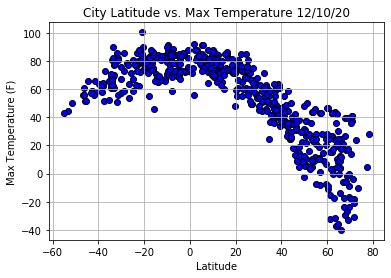

In [10]:
x_axis = clean_df["Lat"]
y_axis = clean_df["Max Temp"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature " + date_pull)
plt.savefig("Images/LatitudeVtemp.png")
plt.show()

As the latitude moves away from the equator, the max temperature decreases and more drastically in the northern hemisphere. The highest max temperatures are at 0 latitude/equator. The regression is not linear but does become linear when the northern and southern hemispheres are split up. The r2 value in the northern hemisphere of 0.76 demonstrates the strong correlation between latitude and max temperature in the norther hemisphere. The southern hemisphere does not correlate as well with an r2 value of 0.31.

## Latitude vs. Humidity Plot

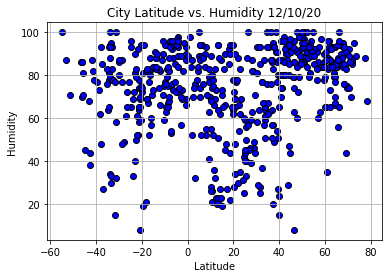

In [11]:
y_axis = clean_df["Humidity"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity " + date_pull)
plt.savefig("Images/LatitudeVhumidity.png")
plt.show()

The humidity does not correlate with latitude. The linear regression below with the low r2 value (0.14 and 0.03) for the northern and southern hemisphere demonstrate the low correlation.

## Latitude vs. Cloudiness Plot

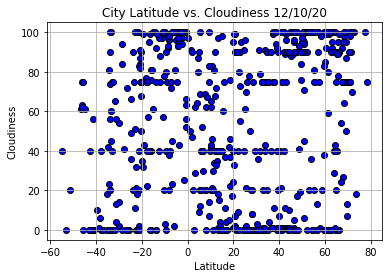

In [12]:
y_axis = clean_df["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness "+ date_pull)
plt.savefig("Images/LatitudeVcloudiness.png")
plt.show()

The cloudiness does not correlate with latitude. The linear regression below with the low r2 value (0.07 and 0.22) for the northern and southern hemisphere demonstrate the low correlation.

## Latitude vs. Wind Speed Plot

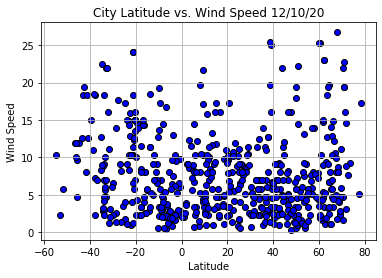

In [13]:
y_axis = clean_df["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed " + date_pull)
plt.savefig("Images/LatitudeVwindSpeed.png")
plt.show()

The wind speed does not correlate with latitude. The linear regression below with the low r2 value (0.01 and 0.08) for the northern and southern hemisphere demonstrate the low correlation.

## Linear Regression

In [14]:
df_north = clean_df.loc[clean_df["Lat"]>=0]
df_south = clean_df.loc[clean_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The rsquare-value is: 0.76


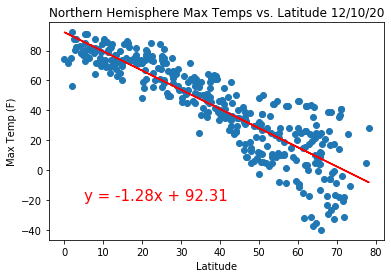

In [15]:
x_axis = df_north["Lat"]
y_axis = df_north["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere Max Temps vs. Latitude " + date_pull)
plt.savefig("Images/LinReg Northern Hemisphere Max Temps vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The rsquare-value is: 0.31


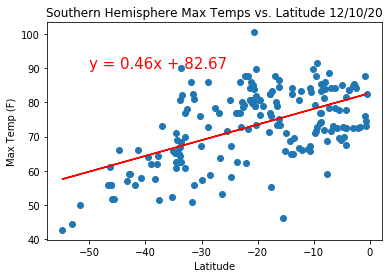

In [16]:
x_axis = df_south["Lat"]
y_axis = df_south["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere Max Temps vs. Latitude " + date_pull)
plt.savefig("Images/LinReg Southern Hemisphere Max Temps vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rsquare-value is: 0.14


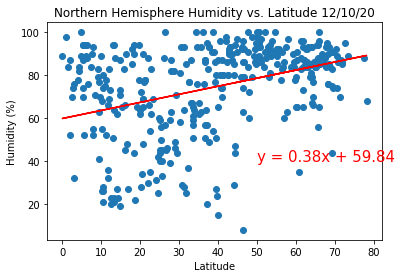

In [17]:
x_axis = df_north["Lat"]
y_axis = df_north["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere Humidity vs. Latitude " + date_pull)
plt.savefig("Images/LinReg Northern Hemisphere Humidity vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rsquare-value is: 0.03


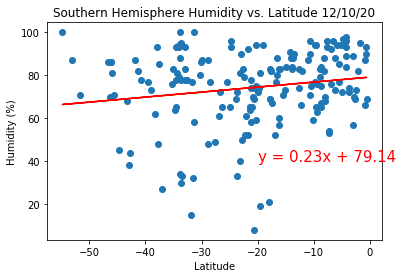

In [18]:
x_axis = df_south["Lat"]
y_axis = df_south["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere Humidity vs. Latitude " + date_pull)
plt.savefig("Images/LinReg Southern Hemisphere Humidity vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rsquare-value is: 0.07


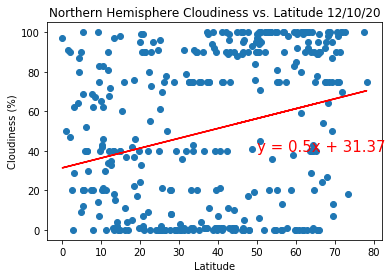

In [19]:
x_axis = df_north["Lat"]
y_axis = df_north["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere Cloudiness vs. Latitude " + date_pull)
plt.savefig("Images/LinReg Northern Hemisphere Cloudiness vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rsquare-value is: 0.22


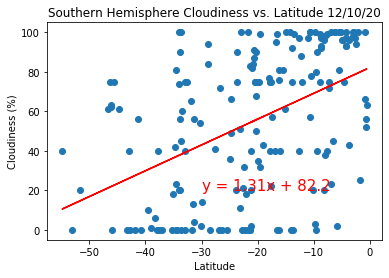

In [20]:
x_axis = df_south["Lat"]
y_axis = df_south["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere Cloudiness vs. Latitude " + date_pull)
plt.savefig("Images/LinReg Southern Hemisphere Cloudiness vs. Latitude.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rsquare-value is: 0.01


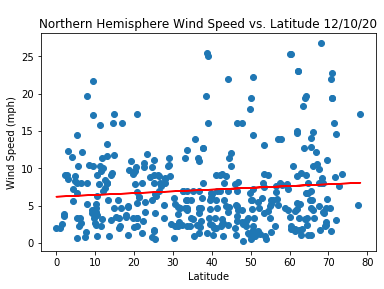

In [21]:
x_axis = df_north["Lat"]
y_axis = df_north["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere Wind Speed vs. Latitude " + date_pull) 
plt.savefig("Images/LinReg Northern Hemisphere Wind Speed vs. Latitude.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rsquare-value is: 0.08


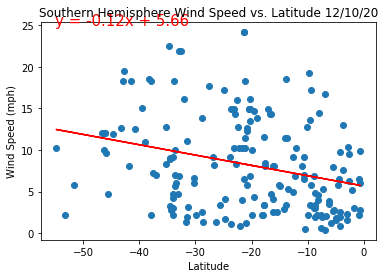

In [22]:
x_axis = df_south["Lat"]
y_axis = df_south["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The rsquare-value is: {round(rvalue**2,2)}")
regress_values = [x * slope + intercept for x in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere Wind Speed vs. Latitude " + date_pull)
plt.savefig("Images/LinReg Southern Hemisphere Wind Speed vs. Latitude.png")
plt.show()